<a href="https://colab.research.google.com/github/TienLungSun/AI-Lecture-notes/blob/main/MSE(IMU%20sensor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load data file to colab
from google.colab import files
uploaded = files.upload()

Saving LOGGER01.CSV to LOGGER01 (1).CSV


In [2]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

LOGGER01.CSV


In [3]:
import pandas as pd
df=pd.read_csv(fname)

In [4]:
df.head(3)

,X,Y,Z
0,11.10,2.24,-4.67
1,11.02,2.16,-4.86
2,11.02,2.16,-4.82


In [5]:
df.columns

Index(['X', 'Y', 'Z'], dtype='object')

In [6]:
#select a column
dfx = df[['X']]
dfx.shape

(801, 1)

In [7]:
#convert to numpy array
import numpy as np
x = np.array(dfx.values)
x.shape

(801, 1)

sample entropy https://en.wikipedia.org/wiki/Sample_entropy

In [8]:
maxscale = 6
tolerance = 0.1 * np.std(x, ddof=1)

In [9]:
MSE = []
for sample_length in range(1, maxscale+1):
  N = len(x)
  B = 0.0
  A = 0.0
    
  # Split time series and save all templates of length m
  xmi = np.array([x[i : i + sample_length] for i in range(N - sample_length)])
  xmj = np.array([x[i : i + sample_length] for i in range(N - sample_length + 1)])

  # Save all matches minus the self-match, compute B
  B = np.sum([np.sum(np.abs(xmii - xmj).max(axis=1) <= tolerance) - 1 for xmii in xmi])

  # Similar for computing A
  sample_length += 1
  xm = np.array([x[i : i + sample_length] for i in range(N - sample_length + 1)])
  A = np.sum([np.sum(np.abs(xmi - xm).max(axis=1) <= tolerance) - 1 for xmi in xm])

  # Return SampEn
  sampen = -np.log(A / B)
  MSE.append(sampen)
print(MSE)

[0.8423983862561103, 0.6058494757229763, 0.4966897144023883, 0.426635815231131, 0.31393115579755265, 0.2396590655819578]


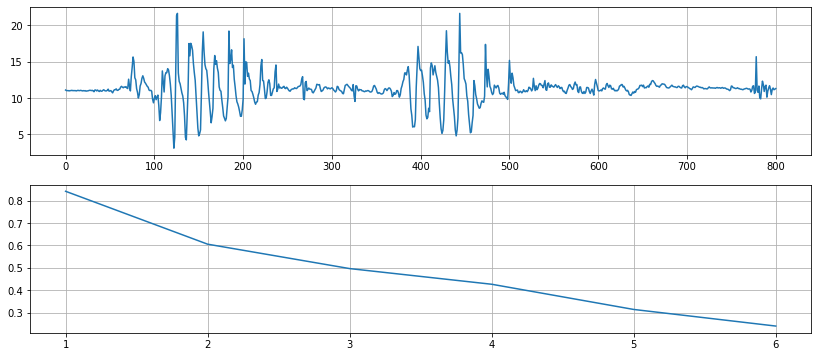

In [10]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(14, 6))
fig.add_subplot(2, 1, 1) 
plt.plot(x)
plt.grid()

fig.add_subplot(2, 1, 2) 
plt.plot(MSE)
plt.xticks(np.arange(len(MSE)), np.arange(1, maxscale+1)) 
plt.grid()
plt.show()